In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

import warnings
warnings.filterwarnings("ignore")

In [5]:
actions = pd.read_csv("../data/user16_vs_user12.csv")
actions.head()

traveled_distance_pixel  elapsed_time  direction_of_movement  straightness  \
0               271.328509         1.326                      1      0.992760   
1               114.401435         0.951                      3      0.988716   
2              1502.533887         3.370                      7      0.594392   
3               261.358520         1.357                      1      0.235519   
4               489.714695         2.215                      7      0.848502   

   num_points  sum_of_angles  mean_curv   sd_curv  max_curv  min_curv  ...  \
0          14      17.763925   0.029904  0.034187  0.392699 -0.028377  ...   
1           9      15.993451  -0.123588  0.426393  0.241661 -1.127937  ...   
2          24      -8.126320   0.147585  0.595290  2.372586 -0.316374  ...   
3          12      13.732380   0.045313  0.161781  0.486189 -0.081541  ...   
4          23      -8.332702   0.232239  1.284013  5.819538 -0.287782  ...   

          min_a     mean_jerk       sd_jerk      max_jerk      min_jerk  \
0  -2387.749473 -3.011601e+02  2.512182e+04  3.891048e+04 -6.412175e+04   
1  -8369.853122  8.012253e+05  2.523058e+06  7.056069e+06 -7.373475e+05   
2 -13528.612557  3.818111e+03  1.219586e+05  4.044996e+05 -3.822861e+05   
3 -34104.424858  2.986979e+06  1.105598e+07  3.627657e+07 -3.655986e+06   
4  -8234.999653  5.264586e+04  2.962966e+05  8.226653e+05 -5.536400e+05   

   a_beg_time  class  action_3  action_4  user_16  
0       0.203     16         0         1        1  
1       0.212     16         0         1        1  
2       0.234     16         0         0        1  
3       0.281     16         1         0        1  
4       0.125     16         1         0        1  

[5 rows x 42 columns]

In [6]:
actions.columns

Index(['traveled_distance_pixel', 'elapsed_time', 'direction_of_movement',
       'straightness', 'num_points', 'sum_of_angles', 'mean_curv', 'sd_curv',
       'max_curv', 'min_curv', 'mean_omega', 'sd_omega', 'max_omega',
       'min_omega', 'largest_deviation', 'dist_end_to_end_line',
       'num_critical_points', 'mean_vx', 'sd_vx', 'max_vx', 'min_vx',
       'mean_vy', 'sd_vy', 'max_vy', 'min_vy', 'mean_v', 'sd_v', 'max_v',
       'min_v', 'mean_a', 'sd_a', 'max_a', 'min_a', 'mean_jerk', 'sd_jerk',
       'max_jerk', 'min_jerk', 'a_beg_time', 'class', 'action_3', 'action_4',
       'user_16'],
      dtype='object')

In [7]:
# split into features and target variable
X = actions.drop("user_16", axis=1)
y = actions["user_16"]

norm_X = normalize(X)

X_train, X_test, y_train, y_test = train_test_split(norm_X, y, test_size=0.3,
                                                    random_state=42)

# K-Nearest Neighbors ridin' solo

In [15]:
# knn algo testing 1 to 100 neighbors to see which number of neighbors is best

scores = []

for i in range(1, 100, 2):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))

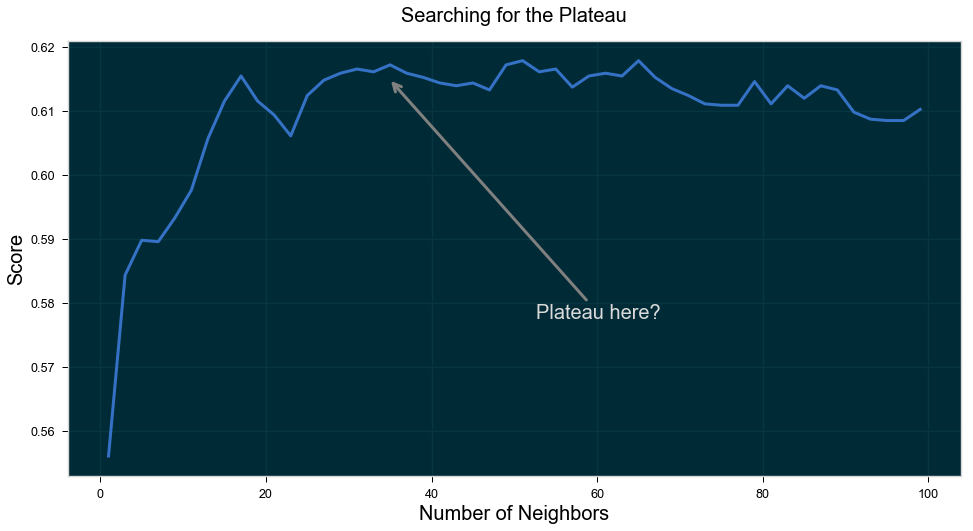

In [21]:
# plot scores for different numbers of neighbors

fig, ax = plt.subplots(figsize=(16, 8))
sns.lineplot(x=list(range(1, 100, 2)), y=scores, ax=ax, lw=3)
ax.set_title("Searching for the Plateau", color="black", size=20, y=1.03)
ax.set_xlabel("Number of Neighbors", color="black", size=20)
ax.set_ylabel("Score", color="black", size=20)
ax.tick_params(colors="black")

ax.annotate("Plateau here?",
            xy=(0.4, 0.85),
            xytext=(0.55, 0.4),
            xycoords="figure fraction",
            textcoords="figure fraction",
            size=20,
            arrowprops=dict(arrowstyle='->',
                            connectionstyle='arc3',
                            color='grey',
                            lw=3))

plt.show()

# knn suggests 28 neighbors might be best

In [22]:
knn_best_guess = KNeighborsClassifier(n_neighbors=38)

In [23]:
knn_best_guess.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=38, p=2,
           weights='uniform')

In [24]:
pred = knn_best_guess.predict(X_test)

In [25]:
print(classification_report(y_test, pred))
print(confusion_matrix(y_test, pred))

              precision    recall  f1-score   support

           0       0.62      0.59      0.60      2311
           1       0.60      0.64      0.62      2282

   micro avg       0.61      0.61      0.61      4593
   macro avg       0.61      0.61      0.61      4593
weighted avg       0.61      0.61      0.61      4593

[[1362  949]
 [ 830 1452]]


============================
### Results

True positives: 1362
True Negatives: 1452
False positives: 949
False negatives: 830

Accuracy: 61%
Values of FP and FN are imbalanced, accuracy potentially not a good measure. Of all the actions labelled, how many were correct.

Precision: 62%
FPR: 38%
Of all actions labelled as not user 16, how many were not user 16.

Recall: 64%
Of all sessions that were user 16, how many were labelled.

F1-score: 0.60
Weighted average of precision and recall.